In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
base_path = '/media/hiroki/share/kaggle_data/trends-assessment-prediction/'
train = pd.read_csv(base_path+'train_scores.csv', dtype={'Id':str})\
            .dropna().reset_index(drop=True) # to make things easy
reveal_ID = pd.read_csv(base_path+'reveal_ID_site2.csv', dtype={'Id':str})
ICN_numbers = pd.read_csv(base_path+'ICN_numbers.csv')
loading = pd.read_csv(base_path+'loading.csv', dtype={'Id':str})
fnc = pd.read_csv(base_path+'fnc.csv', dtype={'Id':str})
sample_submission = pd.read_csv(base_path+'sample_submission.csv', dtype={'Id':str})
svd = pd.read_csv(base_path+'image_svd_features.csv', dtype={'Id':str})

In [9]:
x = loading.merge(fnc, on='Id', how='left')

In [10]:
x.drop('Id', axis=1, inplace=True)

In [11]:
x = x.values

In [12]:
corr = np.corrcoef(x)

In [13]:
corr.shape

(11754, 11754)

In [31]:
corr_triu = np.triu(corr, k=1)

In [32]:
corr_triu

array([[0.        , 0.6836751 , 0.63052247, ..., 0.6589466 , 0.64460128,
        0.70288852],
       [0.        , 0.        , 0.5716637 , ..., 0.58144848, 0.73096523,
        0.54793055],
       [0.        , 0.        , 0.        , ..., 0.64247172, 0.60873868,
        0.59170338],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.56935978,
        0.57734264],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.58165477],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
idx = np.nonzero(corr_triu)

In [35]:
a = corr_triu[idx]

In [40]:
a.std()

array([0.6836751 , 0.63052247, 0.76432828, ..., 0.56935978, 0.57734264,
       0.58165477])

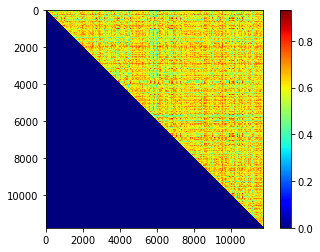

In [33]:
plt.imshow(corr_triu, cmap="jet")
plt.colorbar()